In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('food_orders_new_delhi.csv')

In [3]:
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
data.tail()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0
999,1000,C4335,R2890,2024-01-08 14:46:43,2024-01-08 15:39:43,1657,20,Digital Wallet,15% New User,180,27,100


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [6]:
data.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [7]:
from datetime import datetime

In [8]:
#Data Cleaning
# Converting Order Date and Time & Delivery Date and Time into DATE_TIME FORMAT
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])

In [9]:
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [10]:
# Extracting Numeric values from 'Discount and Offers'
def extract_discountValue(discount_string):
    if isinstance(discount_string,str): # checks whether the value of the'discount_string' is a 'string'
        if 'off' in discount_string: #Fixed Amount
            return float(discount_string.split(' ')[0])
        elif '%' in discount_string: #Percentage Amount
            return float(discount_string.split('%')[0])
        else: #No discount
            return 0.0

In [11]:
# apply the function to create a new 'Discount Value' column
data['Discount Percentage'] = data['Discounts and Offers'].apply(lambda x: extract_discountValue(x))

# for percentage discounts, calculate the discount amount based on the order value
data['Discount Amount'] = data.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100) if x['Discount Percentage'] > 1 else x['Discount Percentage'], axis=1)

# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
data['Discount Amount'] = data.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1 else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

data['Discount Percentage'] = data['Discount Percentage'].fillna(0.0)
data['Discount Amount'] = data['Discount Amount'].fillna(0.0)

print(data[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head())

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  NaN                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
 12  Discount Percentage     1000 non-null   float64  

# COST AND PROFITABILITY ANALYSIS

In [13]:
# Delivery Fee, Commission Fee, Payment Processing Fee, #Discount Amount

#COST - DELIVERY FEE, PAYMENT PROCESSING FEE, DISCOUNT AMOUNT
#REVENUE - COMMISSION AMOUNT
#PROFIT = REVENUE - TOTAL COSTS

data['Total Costs'] = data['Delivery Fee']+data['Payment Processing Fee']+data['Discount Amount']
data['Revenue'] = data['Commission Fee']
data['Profit'] = data['Revenue']-data['Total Costs']

In [14]:
#Aggregate Data
Total_Orders = data.shape[0] #Total row count(Number of Orders Count) 0-999--->1000
Total_Revenue = data['Revenue'].sum()
Total_Costs = data['Total Costs'].sum()
Total_Profit = data['Profit'].sum()

Aggregate_Data = {
    "Total Orders" : Total_Orders,
    "Total Revenue": Total_Revenue,
    "Total Costs"  : Total_Costs,
    "Total Profit" : Total_Profit
}

print(Aggregate_Data)

{'Total Orders': 1000, 'Total Revenue': np.int64(126990), 'Total Costs': np.float64(232709.85), 'Total Profit': np.float64(-105719.85)}


In [ ]:
# Cost>Revenue

In [15]:
import matplotlib.pyplot as plt

# Histogram to plot Profits per Order

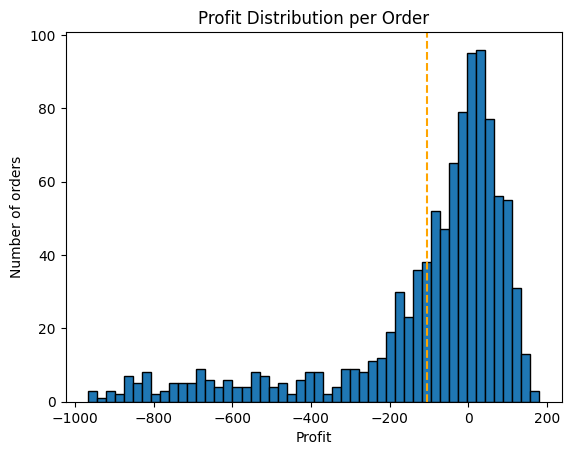

In [16]:
plt.hist(data['Profit'], bins=50, edgecolor='black')
plt.title('Profit Distribution per Order')
plt.xlabel('Profit')
plt.ylabel('Number of orders')
plt.axvline(data['Profit'].mean(), color='orange',linestyle='dashed')
plt.show()

In [ ]:
# orange dashed line - Average Profit
# Most of the orders are in the Profit range below 0

# Pie Chart for the Proportion of Total Costs

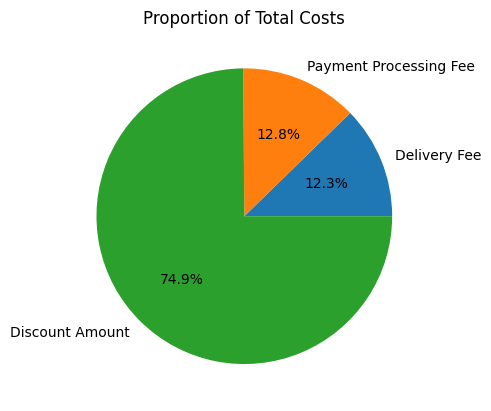

In [17]:
costs_breakdown = data[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%')
plt.title('Proportion of Total Costs')
plt.show()

In [ ]:
#  Discount Amount marks the significant proportion towards Total Costs

# Comparison of Total Revenue, Total Costs and Profit (Net Loss here)

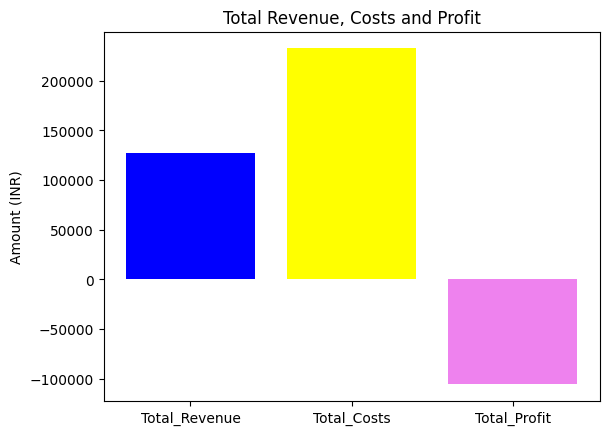

In [18]:
totals = ['Total_Revenue','Total_Costs','Total_Profit']
values = [Total_Revenue, Total_Costs, Total_Profit]
plt.bar(totals, values, color=['blue','yellow','violet'])
plt.title('Total Revenue, Costs and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [ ]:
# Costs surpasses Revenue which leads to Total Loss

# To find a New Strategy for Profitability
# New Average Commission % based on Profiatable Orders
# New Average Discount % for profitable orders

In [19]:
# Profitable Orders
Profitable_Orders = data[data['Profit']>0]

# Average Commission % for Profitable Orders
Profitable_Orders['Commission Percentage'] = (Profitable_Orders['Commission Fee']/Profitable_Orders['Order Value'])*100

# Average Discount %  for Profitable Orders
Profitable_Orders['Effective Discount Percentage'] = (Profitable_Orders['Discount Amount']/Profitable_Orders['Order Value'])*100

# Calculate New Averages
new_avg_commission_percentage = Profitable_Orders['Commission Percentage'].mean()
new_avg_discount_percentage = Profitable_Orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage,new_avg_discount_percentage)

30.508436145149435 5.867469879518072


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8224\3777034089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Profitable_Orders['Commission Percentage'] = (Profitable_Orders['Commission Fee']/Profitable_Orders['Order Value'])*100
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8224\3777034089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Profitable_Orders['Effective Discount Percentage'] = (Profitable_Orders['Discount Amount']/Profitable_Orders['Order Value'])*100


# New Average Commission Percenatage: 30.51%
# New Average Discount Percentage: 5.87%

In [20]:
Orders = data[['Profit']]
Orders['Commission Percentage'] = (data['Commission Fee']/data['Order Value'])*100
Orders['Discount Percentage'] = (data['Discount Amount']/data['Order Value'])*100

avg_commission_percentage = Orders['Commission Percentage'].mean()
avg_discount_percentage = Orders['Discount Percentage'].mean()

print(avg_commission_percentage,avg_discount_percentage)

19.750890168545332 16.265


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8224\3986087853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Orders['Commission Percentage'] = (data['Commission Fee']/data['Order Value'])*100
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8224\3986087853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Orders['Discount Percentage'] = (data['Discount Amount']/data['Order Value'])*100


                        All Orders  - Profitable Orders
    Commission %          19.75            30.51

    Discount %            16.27            5.87

    # So a strategy aiming for a Commission Percentage around 30% and a Discount Percentage around 6% could increase the Profitability

# Calculate Profitability per Order Using Actual Commission and Discount Rates
# Simulate Profitability per Order for the Recommended Commission and Discount Rates to see the potential impact on Profitablility

In [22]:
# simulating profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculating the simulated commission fee and discount amount using recommended percentages
data['Simulated Commission Fee'] = data['Order Value'] * (recommended_commission_percentage / 100)
data['Simulated Discount Amount'] = data['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
data['Simulated Total Costs'] = (data['Delivery Fee'] +
                                        data['Payment Processing Fee'] +
                                        data['Simulated Discount Amount'])

data['Simulated Profit'] = (data['Simulated Commission Fee'] - data['Simulated Total Costs']) # Revenue - Costs

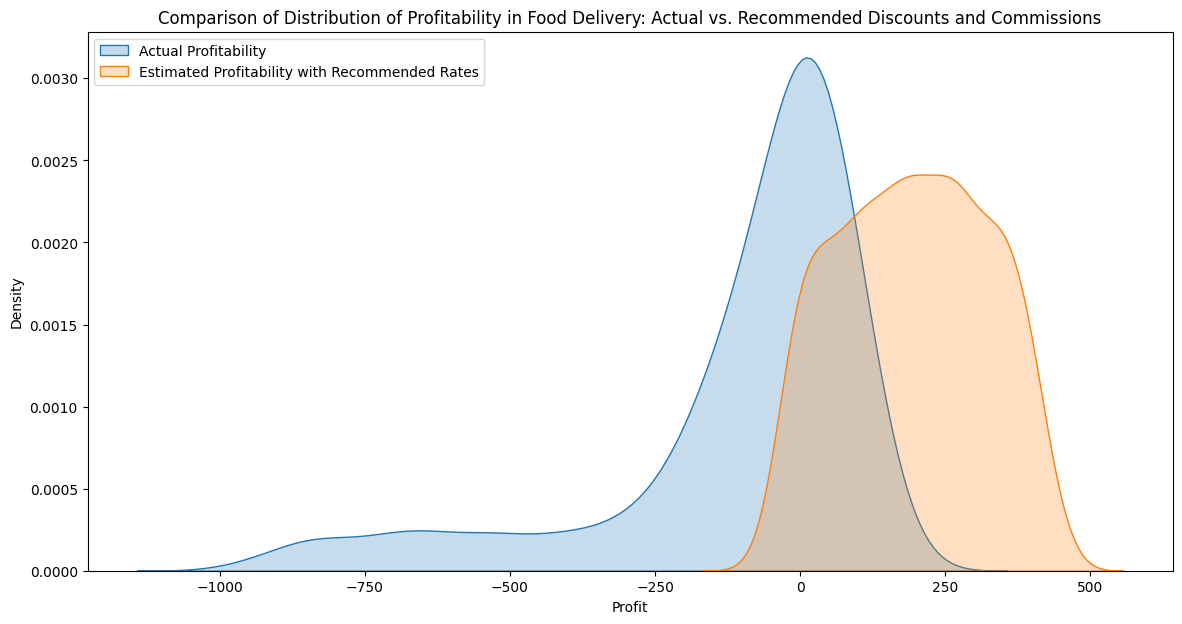

In [26]:
# visualizing the comparison
import seaborn as sns
plt.figure(figsize=(14,7))
# actual profitability 
# kde - kernel density estimation
sns.kdeplot(data['Profit'], label='Actual Profitability',fill=True)

# simulated profitability
sns.kdeplot(data['Simulated Profit'], label='Estimated Profitability with Recommended Rates',fill=True)

plt.title('Comparison of Distribution of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

# The distribution is more skewed towards Positive Profit in the profitability distribution while computed using the recommended rates